*October, 29th, 2024*

### **IMPORTANT NOTE:** If you are accessing this notebook directly in Colab, do not forget to create a copy and work in your own file. You can do this by selecting:

### **FILE -> Save a copy in Drive**

### This will save a copy in your own Drive space.

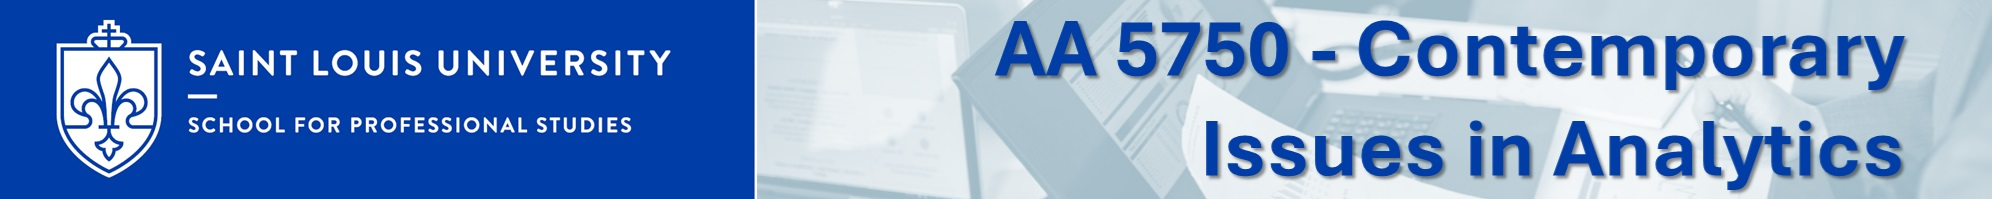

# **Week 2. Convolutional Neural Networks and Image Recognition.**
## **PART 1: MANIPULATING IMAGES**

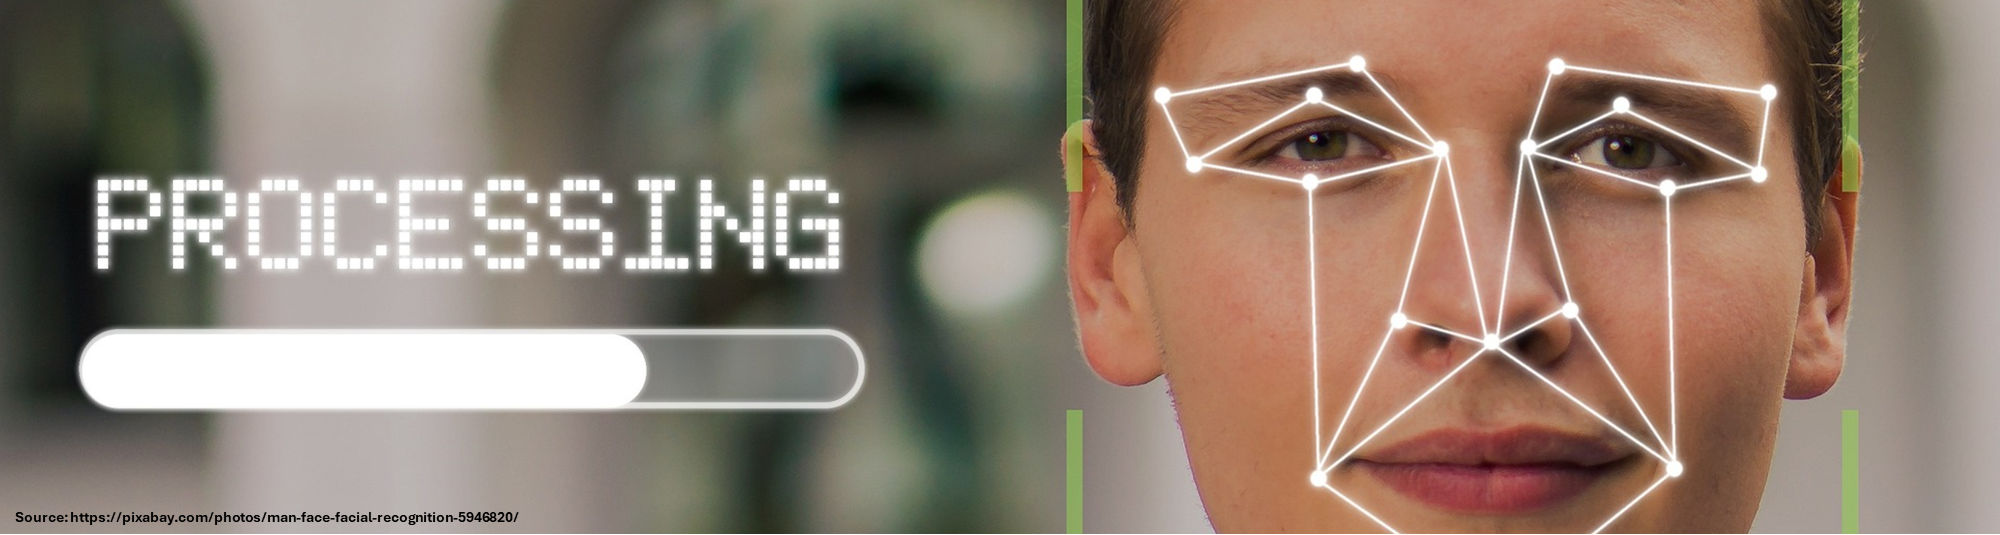

# **GOAL:** To become acquainted with the main concepts of image recognition and manipulation using OpenCV, and to familiarize yourself with techniques for edge detection.

----------------------
## **Objective**
----------------------

We will manipulate images using the OpenCV and Pillow libraries, and we will also try different filters for edge detection.

# **INDEX**

1. Image uploading
2. PIL
3. OpenCV


**File to use**: test_image.png


## **Information about both libraries:**

* PIL documentation: https://pypi.org/project/pillow/
* OpenCV documentation: https://opencv.org/

**Pillow (PIL) is one of the most relevant image recognition libraries.**

Functions commonly used in PIL:

* open() - Reads the image at the specified path.
* load() - Extracts the pixel map of the image.
* display() - Shows the image. size - Displays the height and width of the image.
* getpixel() - Returns the values of the 3 color channels.
* save() - Saves the image.
* convert() - Converts the image to the requested format. *
* getchannel() - Used to obtain individual color channels.

## **1.Importing libraries and images**

In [ ]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import files
# Import test_image.png
uploaded = files.upload()

Saving test_image.png to test_image (1).png


## **2. Using PIL**

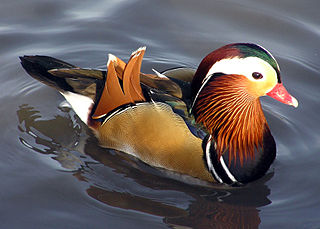

In [ ]:
# We load the image
image_path = 'test_image.png'

# Import the image
image = Image.open(image_path)

# The pixel map is extracted
pixel_matrix = image.load()

display(image)

In [ ]:
# Display the image size
print("Image Size (Width x Height):", image.size)

Image Size (Width x Height): (320, 229)


In [ ]:
# Ensure the image is in RGB mode
image = image.convert('RGB')

# Extract the RGB channels
r, g, b = image.split()

# Display the size of each matrix (same as the image size)
print("Image Size (Width x Height):", image.size)

# Convert each channel to a matrix by getting pixel values
r_matrix = [[r.getpixel((x, y)) for x in range(image.width)] for y in range(image.height)]
g_matrix = [[g.getpixel((x, y)) for x in range(image.width)] for y in range(image.height)]
b_matrix = [[b.getpixel((x, y)) for x in range(image.width)] for y in range(image.height)]

# Display a small portion (100x100) of each RGB matrix for reference
print("Red Channel Matrix (100x100 sample):")
for row in r_matrix[:100]:
    print(row[:100])

print("\nGreen Channel Matrix (100x100 sample):")
for row in g_matrix[:100]:
    print(row[:100])

print("\nBlue Channel Matrix (100x100 sample):")
for row in b_matrix[:100]:
    print(row[:100])

Image Size (Width x Height): (320, 229)
Red Channel Matrix (100x100 sample):
[111, 111, 110, 110, 110, 111, 112, 112, 112, 112, 112, 111, 111, 111, 110, 110, 107, 108, 109, 110, 110, 110, 109, 108, 113, 113, 113, 113, 113, 112, 112, 112, 109, 109, 109, 108, 108, 107, 107, 106, 110, 110, 110, 111, 111, 111, 112, 112, 107, 108, 109, 109, 109, 108, 107, 106, 107, 107, 108, 109, 111, 112, 112, 113, 116, 118, 119, 119, 118, 117, 118, 119, 116, 116, 116, 116, 116, 117, 117, 117, 119, 119, 119, 119, 119, 121, 124, 126, 124, 125, 125, 125, 126, 126, 126, 127, 127, 129, 132, 134]
[111, 111, 110, 110, 110, 111, 111, 112, 111, 111, 111, 111, 112, 112, 112, 112, 108, 109, 109, 110, 110, 110, 109, 109, 112, 112, 112, 112, 112, 112, 112, 112, 107, 107, 106, 106, 105, 104, 104, 104, 107, 107, 107, 107, 107, 107, 107, 107, 103, 104, 105, 105, 105, 104, 103, 103, 103, 103, 104, 105, 106, 107, 108, 109, 113, 114, 116, 117, 117, 117, 118, 119, 118, 118, 118, 118, 119, 119, 120, 120, 122, 123, 124, 123, 1

**Conversion from RGB to Grayscale**

The grayscale image is obtained by calculating the average of the three channels of an RGB image.

The formula for the conversion is shown:

(
𝑅
+
𝐺
+
𝐵
) / 3









In [ ]:
# Defining the number of pixels for widht and height
width, height = image.size
print(width, height)

# Load pixel map to modify the image directly
pixel_matrix = image.load()

# We create a function to get the average for every pixel in RGB matrices and
# saving the result
for i in range(width):
    for j in range(height):

        # Obtaining RGB pixels
        r, g, b,= image.getpixel((i, j))

        # Aplying the formula
        grayscale = (r+g+b)/3  # promedio en escala de grises

        # Defining values
        pixel_matrix[i, j] = (int(grayscale), int(grayscale), int(grayscale))



320 229


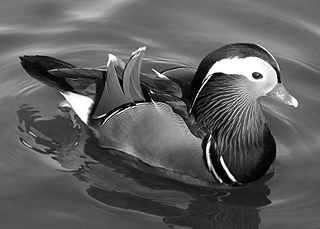

In [ ]:
display(image)

### **Using the formula for getting grayscale images**

This common formula for obtaining a grayscale image is theoretically correct, but researchers have developed an improved formula based on the weighted average of pixel intensities of the red, green, and blue colors, which can be represented as:

<b>
<center><h1>
${(0.299R+0.587G+0.114B)}$

320 229


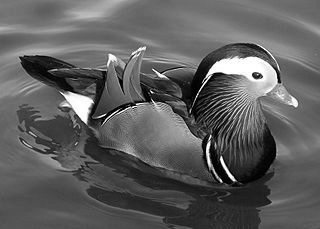

In [ ]:

# Define the number of pixels for width and height
width, height = image.size
print(width, height)

# Create a new blank grayscale image with the same size as the original
grayscale_image = Image.new("RGB", (width, height))

# Load the pixel map for both the original and new grayscale image
pixel_matrix = image.load()
new_pixel_matrix = grayscale_image.load()

# Convert to grayscale using the weighted formula
for i in range(width):
    for j in range(height):
        # Obtaining the RGB values
        r, g, b = image.getpixel((i, j))

        # Applying the grayscale weighted formula
        grayscale = (0.299 * r + 0.587 * g + 0.114 * b)

        # Setting the grayscale value in the new image
        new_pixel_matrix[i, j] = (int(grayscale), int(grayscale), int(grayscale))

# Display the new grayscale image
display(grayscale_image)

### **Visualizing the 3 channels of the RGB image**

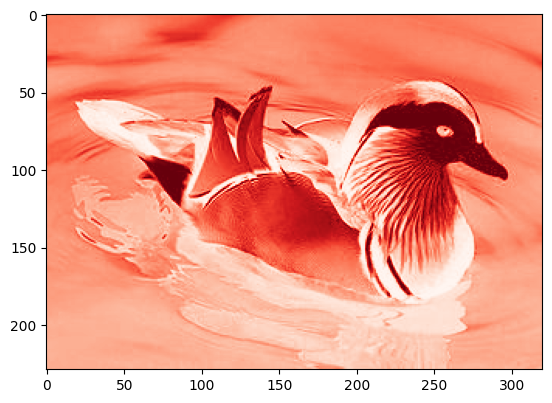

In [ ]:
image_path = 'test_image.png'
image=Image.open(image_path)
image=image.convert('RGB')
plt.imshow(image.getchannel('R'))
plt.set_cmap("Reds")

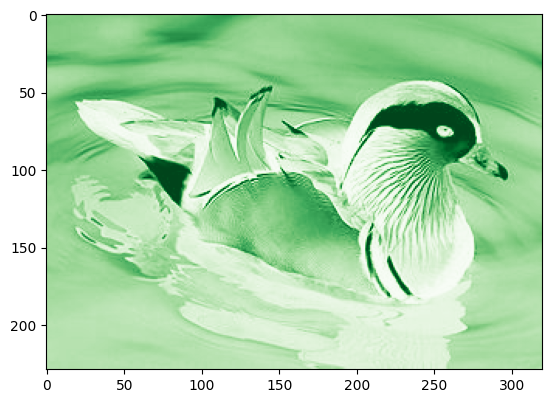

In [ ]:
plt.imshow(image.getchannel('G'))
plt.set_cmap("Greens")

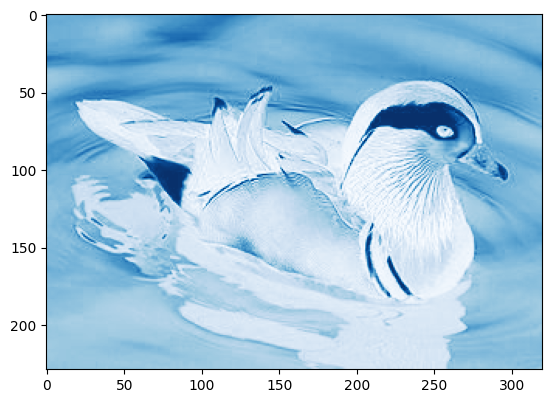

In [ ]:
plt.imshow(image.getchannel('B'))
plt.set_cmap("Blues")

## **3. Using OpenCV**

**OpenCV** stands for Open Source Computer Vision.

In this section, we will exemplify and learn the use of the OpenCV library.

**OpenCV** is a vast **open-source library** for **computer vision**, **machine learning**, and **image processing**. It can process images and videos to identify objects, faces, or even human handwriting. It can also integrate with other libraries such as **Numpy** (Python), which can process OpenCV’s array structure.

OpenCV is used to identify image patterns and various image features by leveraging vector space and performing mathematical operations on these features.

### Here, we will cover the following topics:
- Reading an image
- Displaying the shape of an image
- Saving the image
- Resizing the image
- Converting the image to grayscale
- Extracting the RGB values of a pixel
- Adjusting brightness and contrast
- Applying Gaussian blur to reduce noise in an image
- Images as a multidimensional array

### **Some of the OpenCV Functions**

#### **1. The functions imread(), imshow(), and imwrite()**
- **imread():** Used to read an image. You can refer to an image in the current working directory or provide the full path to the image.
- **imshow():** Used to display the image in a window. For operations in Colab, use *"import from google.colab.patches"* and *"import cv2_imshow()"* to display the image. We will use this in this practice notebook.
- **imwrite():** Used to save an image in the current working directory. You can use this to preprocess your images and then save the changes.

#### **2. Image Shape**
- **.shape:** After reading the image, use .shape to find the dimensions of the image.
- Additionally, printing a read image displays the numpy array implementation of the image, indicating that the image is saved as a numpy array in the object.

#### **3. Resizing the Image**
- **resize():** Used to resize the image to a desired size.  
Syntax - "*cv2.resize(image, (110, 110))*"
- Resizing the image can help reduce the number of pixels, providing computational advantages by reducing the training time of a neural network. The larger the number of pixels in an image, the greater the number of input nodes, which in turn increases the model's complexity.
- Resizing also allows for zooming into images, aiding in improved feature extraction.
- Often, resizing an image, whether reducing or enlarging it, is needed to meet certain image size requirements, making it an essential step in the process.

#### **4. Converting an Image**
- **cvtColor():** Used to convert images using a specified conversion scheme.  
Syntax - "*cv2.cvtColor(image, code)*"
- The arguments for this function are the image and the conversion code to be applied. To convert images to grayscale, for example, we use the conversion code 'cv2.COLOR_BGR2GRAY' as the second argument.

#### **5. Gaussian Blur**
- **cv2.GaussianBlur():** Used to apply Gaussian blur to the image.  
Syntax - *cv2.GaussianBlur(image, (5, 5), 2).*
The image is passed to the function along with the kernel size, for example, "*cv2.GaussianBlur(image, (5, 5))*". Experiment with different kernel sizes to observe variations in blur.

#### **6. Extracting the ROI (Region of Interest)**
- A simple slicing operation, similar to numpy array slicing, can be used to extract the required Region of Interest.  
Syntax - *image[30:200,30:200]*
This can be used to extract specific required regions from the image and can be an important hyperparameter if the images exhibit high variability in the locations of important pixels.



**Using OpenCV in Google Colab**

Google Colab already comes with the OpenCV module pre-installed, and Google periodically updates it to the latest version.



In [ ]:
from google.colab import files
# Import: opencv.jpg
uploaded = files.upload()

Saving opencv.jpg to opencv (2).jpg


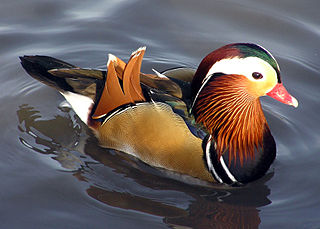

In [ ]:
# "Leyendo" la imagen
img = cv2.imread('opencv.jpg')
# Mostrando la imagen usando cv2
cv2_imshow(img)

### **Resizing Images**

Medida original : (229, 320, 3)
Nueva medida      : (400, 400, 3)


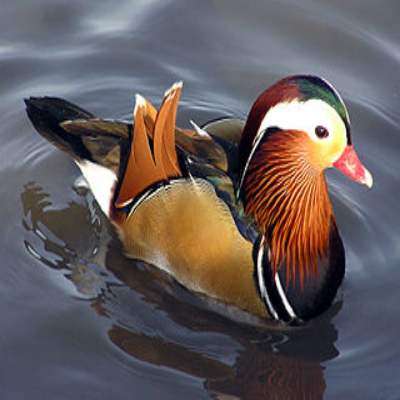

In [ ]:
height = 400
width = 400
dimensions = (width, height)
new_image = cv2.resize(img, dimensions)
print("Medida original :", img.shape )
print("Nueva medida      :", new_image.shape)
cv2_imshow(new_image)

### **Resizing with a Scale Factor**

Medida original : (229, 320, 3)
Nueva medida      : (91, 128, 3)


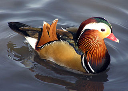

In [ ]:
height = img.shape[0]
width = img.shape[1]

# Queremos una nueva imagen del 40% de la original
scale_factor = 0.4
new_height = int(height * scale_factor)  # 229 * 0.4 = 91
new_width = int(width * scale_factor)    # 320 * 0.4 = 128
dimensions = (new_width, new_height)     # (91, 128)
new_image = cv2.resize(img, dimensions, interpolation=cv2.INTER_LINEAR)
print("Medida original :", img.shape )
print("Nueva medida      :", new_image.shape)
cv2_imshow(new_image)

### **Conversion to GrayscaleConversion to Grayscale**

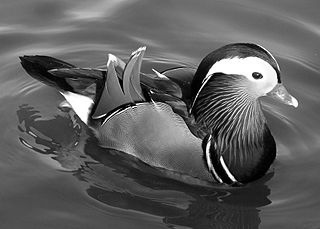

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(img_gray)

### **Adjusting Image Brightness and Contrast**

Increasing the contrast of an image enhances the difference between light and dark areas. Decreasing the contrast, on the other hand, makes the image appear slightly washed out. Finding the appropriate contrast for an image can sometimes be a useful hyperparameter to adjust for maximizing the performance of our Deep Learning models.

The brightness of an image is altered by manipulating its pixel values. The higher the pixel value, the closer it is to white, resulting in a brighter image. Conversely, reducing pixel values makes the image darker. Adjusting pixel brightness is as simple as adding a variable value to each pixel's intensity.

Contrast and brightness adjustments are frequently used in object detection and image segmentation tasks in Computer Vision to make object edges clearer by exaggerating intensity differences between neighboring pixels.

To adjust contrast and brightness in images, we use a function called **convertScaleAbs()**.

Original image


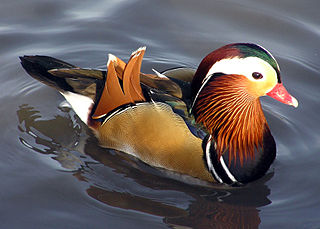



Modified image


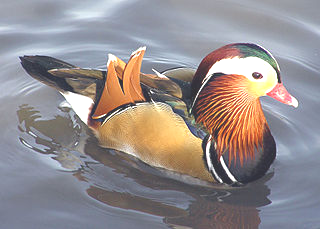

In [ ]:
# This function adjust for brightness and contrast
def brightness_contrast(img, alpha = 0, beta = 0):
   #alpha: contrast control (1.0-3.0)
   #beta: brightness control (0-100)
    adjusted = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    return adjusted

# Let's use an alpha value of 1
# Let's use an beta value of 50

new_img = brightness_contrast(img, 1, 50)

print("Original image")
cv2_imshow(img)

print("\n")

print("Modified image")
cv2_imshow(new_img)

### **Gaussian Blurring**


Gaussian Blurring is an image filtering technique that uses a kernel with values in a Gaussian distribution. The values are generated by a Gaussian function, requiring a sigma value as a parameter.

Gaussian Blurring helps with noise reduction and image smoothing. Through Gaussian Blurring, low-intensity edges are removed, which helps conceal certain image details when needed.

Original image


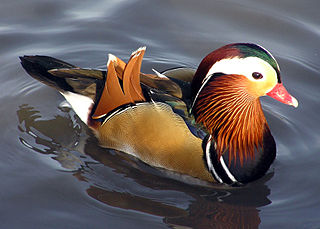



Results for the first blurring 



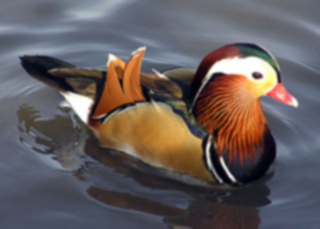



Results for the second blurring 



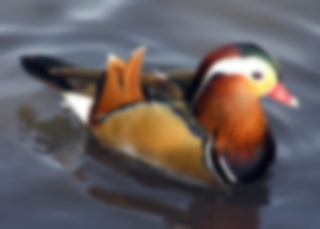

In [ ]:
Gaussian1 = cv2.GaussianBlur(img, ksize =(5, 5),sigmaX =  0)
Gaussian2 = cv2.GaussianBlur(img,ksize= (15, 15), sigmaX= 0)
print('Original image')
cv2_imshow(img)

print("\n")

print('Results for the first blurring \n')
cv2_imshow(Gaussian1)

print("\n")

print('Results for the second blurring \n')
cv2_imshow(Gaussian2)

### **Region of Interest**

- Extracting the Region of Interest (ROI) from an image is as simple as slicing an array in Python.
- In this case, we slice the numpy arrays representing the images to extract the Region of Interest.
- This technique is used to focus on specific regions of our image (i.e., the Region of Interest). It may be necessary in certain use cases where only part of the image contains the information truly needed for a Computer Vision task, and the background parts of an image can be removed as they do not contribute any value to the predictive power required by our model.

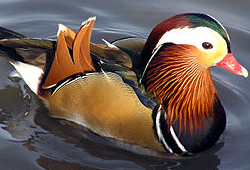

In [ ]:
roi=img[30:200,50:300]
cv2_imshow(roi)

## **END OF THE NOTEBOOK**